<a href="https://colab.research.google.com/github/kowshalyagp/Solar-power-prediction-using-machine-learning/blob/main/week2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Sample Dataset:
   Sunlight_Hours  Temperature  Cloud_Cover  Panel_Angle  Humidity  \
0               6           24           30           25        60   
1               8           27           20           30        55   
2               7           25           25           20        65   
3               9           29           15           35        50   
4              10           31           10           30        45   

   Wind_Speed  Power_Output_Watts  
0          10                 220  
1          12                 310  
2           8                 280  
3          14                 360  
4          11                 400  

📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Sunlight_Hours      10 non-null     int64
 1   Temperature         10 non-null     int64
 2   Cloud_Cover         10 non-null   

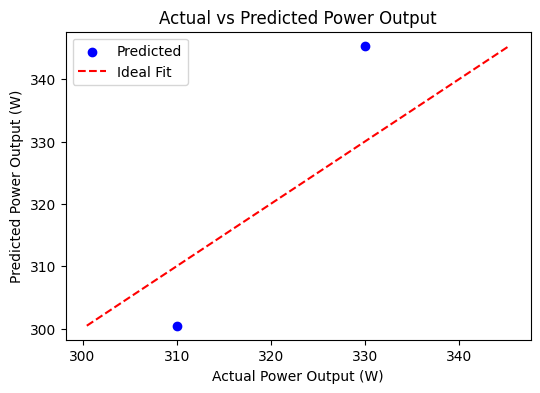

In [ ]:
# ===============================
# 🌞 SOLAR POWER PREDICTION USING MACHINE LEARNING
# ===============================

# -----------------------------
# 📍 Week 1 - Implementation
# -----------------------------
# Steps:
# 1. Define the Problem
# 2. Data Collection & Understanding
# 3. Data Preprocessing
# 4. Data Splitting

import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Problem Definition
# Goal: Predict solar power output (Watts) based on environmental & panel conditions.

# 2. Data Collection (Synthetic dataset for demo)
data = {
    "Sunlight_Hours": [6, 8, 7, 9, 10, 5, 11, 4, 8, 9],
    "Temperature":    [24, 27, 25, 29, 31, 22, 33, 20, 28, 30],
    "Cloud_Cover":    [30, 20, 25, 15, 10, 40, 5, 50, 18, 12],
    "Panel_Angle":    [25, 30, 20, 35, 30, 15, 40, 10, 28, 32],
    "Humidity":       [60, 55, 65, 50, 45, 70, 40, 75, 58, 48],
    "Wind_Speed":     [10, 12, 8, 14, 11, 9, 15, 7, 13, 12],
    "Power_Output_Watts": [220, 310, 280, 360, 400, 180, 420, 150, 330, 390]
}

df = pd.DataFrame(data)

print("📊 Sample Dataset:")
print(df.head())

# Dataset info
print("\n📈 Dataset Info:")
print(df.info())

# Summary statistics
print("\n🔎 Summary Statistics:")
print(df.describe())

# 3. Data Preprocessing
print("\n❓ Missing Values Check:")
print(df.isnull().sum())

# 4. Data Splitting
X = df.drop("Power_Output_Watts", axis=1)
y = df["Power_Output_Watts"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n✅ Data Split Done:")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


# -----------------------------
# 🤖 Week 2 - Implementation
# -----------------------------
# Steps:
# 5. Choose ML Model
# 6. Implement ML Model
# 7. Evaluate ML Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 5. Choose ML Model → Linear Regression (good for regression problems)
model = LinearRegression()

# 6. Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("\n✅ Model Training Completed")

# 7. Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n📊 Model Evaluation Results:")
print("R² Score (Accuracy):", round(r2, 3))
print("Mean Absolute Error (Watts):", round(mae, 2))
print("Mean Squared Error:", round(mse, 2))
print("Mean Absolute Percentage Error (MAPE %):", round(mape, 2))

# Show Actual vs Predicted
comparison = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred.round(2)})
print("\n🔍 Actual vs Predicted Power Output:")
print(comparison)

# Visualize Actual vs Predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color="blue", label="Predicted")
min_v = min(y_test.min(), y_pred.min())
max_v = max(y_test.max(), y_pred.max())
plt.plot([min_v, max_v], [min_v, max_v], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Power Output (W)")
plt.ylabel("Predicted Power Output (W)")
plt.title("Actual vs Predicted Power Output")
plt.legend()
plt.show()